In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

/Users/Apple/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('train.csv', parse_dates=['Date'], dayfirst=True)
test = pd.read_csv('test.csv', parse_dates=['Date'], dayfirst=True)
ss = pd.read_csv('samplesubmission.csv')

In [3]:
train['Date'][0]

Timestamp('1990-09-01 00:00:00')

In [4]:
pd.to_datetime(train['Date'].iloc[0:1], format = '%y-%m-%d')

0   1990-09-01
Name: Date, dtype: datetime64[ns]

In [5]:
train['Date'] = pd.to_datetime(train['Date'], format='%y-%m-%d')
test['Date'] = pd.to_datetime(test['Date'], format='%y-%m-%d')

In [6]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.week
train['Day_Of_Week'] = train['Date'].dt.dayofweek
train['Day'] = train['Date'].dt.day

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Week'] = test['Date'].dt.week
test['Day_Of_Week'] = test['Date'].dt.dayofweek
test['Day'] = test['Date'].dt.day

In [7]:
for i in train['Park_ID'].unique():
    if i == 17:
        continue
    train['Average_Breeze_Speed'][train['Park_ID']==i] = train['Average_Breeze_Speed'][train['Park_ID']==i].fillna(train['Average_Breeze_Speed'][train['Park_ID']==i].median())
    train['Max_Breeze_Speed'][train['Park_ID']==i] = train['Max_Breeze_Speed'][train['Park_ID']==i].fillna(train['Max_Breeze_Speed'][train['Park_ID']==i].median())
    train['Min_Breeze_Speed'][train['Park_ID']==i] = train['Min_Breeze_Speed'][train['Park_ID']==i].fillna(train['Min_Breeze_Speed'][train['Park_ID']==i].median())
    
    test['Average_Breeze_Speed'][test['Park_ID']==i] = test['Average_Breeze_Speed'][test['Park_ID']==i].fillna(test['Average_Breeze_Speed'][test['Park_ID']==i].median())
    test['Max_Breeze_Speed'][test['Park_ID']==i] = test['Max_Breeze_Speed'][test['Park_ID']==i].fillna(test['Max_Breeze_Speed'][test['Park_ID']==i].median())
    test['Min_Breeze_Speed'][test['Park_ID']==i] = test['Min_Breeze_Speed'][test['Park_ID']==i].fillna(test['Min_Breeze_Speed'][test['Park_ID']==i].median())

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

In [8]:
for i in [16,14,19]:
    train['Average_Atmospheric_Pressure'][train['Park_ID'] == i] = train['Average_Atmospheric_Pressure'][train['Park_ID'] == i].fillna(train[train['Park_ID'] == i]['Average_Atmospheric_Pressure'].median())
    train['Max_Atmospheric_Pressure'][train['Park_ID'] == i] = train['Max_Atmospheric_Pressure'][train['Park_ID'] == i].fillna(train[train['Park_ID'] == i]['Max_Atmospheric_Pressure'].median())
    train['Min_Atmospheric_Pressure'][train['Park_ID'] == i] = train['Min_Atmospheric_Pressure'][train['Park_ID'] == i].fillna(train[train['Park_ID'] == i]['Min_Atmospheric_Pressure'].median())
    
    test['Average_Atmospheric_Pressure'][test['Park_ID'] == i] = test['Average_Atmospheric_Pressure'][test['Park_ID'] == i].fillna(test[test['Park_ID'] == i]['Average_Atmospheric_Pressure'].median())
    test['Max_Atmospheric_Pressure'][test['Park_ID'] == i] = test['Max_Atmospheric_Pressure'][test['Park_ID'] == i].fillna(test[test['Park_ID'] == i]['Max_Atmospheric_Pressure'].median())
    test['Min_Atmospheric_Pressure'][test['Park_ID'] == i] = test['Min_Atmospheric_Pressure'][test['Park_ID'] == i].fillna(test[test['Park_ID'] == i]['Min_Atmospheric_Pressure'].median())

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__ma

In [9]:
# k1 = train[(train['Park_ID'] == 16) & (train['Year']<1993)].ID
# k2 = test[(test['Park_ID'] == 16) & (test['Year']<1993)].ID

In [10]:
# train = train[~train['ID'].isin(k1)]
# test = test[~test['ID'].isin(k2)]

In [10]:
for i in [16,14,31,20,15,36,24,32,27,23,33,19,38,21,34,22,12,13]:
    train['Max_Ambient_Pollution'][train['Park_ID'] == i] = train['Max_Ambient_Pollution'][train['Park_ID'] == i].fillna(train[train['Park_ID'] == i]['Max_Ambient_Pollution'].median())
    train['Min_Ambient_Pollution'][train['Park_ID'] == i] = train['Min_Ambient_Pollution'][train['Park_ID'] == i].fillna(train[train['Park_ID'] == i]['Min_Ambient_Pollution'].median())
  
for i in [16,14,31,20,15,36,24,32,27,23,33,19,38,21,34,22,12,13,28]:
    test['Max_Ambient_Pollution'][test['Park_ID'] == i] = test['Max_Ambient_Pollution'][test['Park_ID'] == i].fillna(test[test['Park_ID'] == i]['Max_Ambient_Pollution'].median())
    test['Min_Ambient_Pollution'][test['Park_ID'] == i] = test['Min_Ambient_Pollution'][test['Park_ID'] == i].fillna(test[test['Park_ID'] == i]['Min_Ambient_Pollution'].median())

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__ma

In [11]:
for i in [14,16,19]:
    train['Average_Moisture_In_Park'][train['Park_ID'] == i] = train['Average_Moisture_In_Park'][train['Park_ID'] == i].fillna(train[train['Park_ID'] == i]['Average_Moisture_In_Park'].median())
    train['Max_Moisture_In_Park'][train['Park_ID'] == i] = train['Max_Moisture_In_Park'][train['Park_ID'] == i].fillna(train[train['Park_ID'] == i]['Max_Moisture_In_Park'].median())
    train['Min_Moisture_In_Park'][train['Park_ID'] == i] = train['Min_Moisture_In_Park'][train['Park_ID'] == i].fillna(train[train['Park_ID'] == i]['Min_Moisture_In_Park'].median())
    
    test['Average_Moisture_In_Park'][test['Park_ID'] == i] = test['Average_Moisture_In_Park'][test['Park_ID'] == i].fillna(test[test['Park_ID'] == i]['Average_Moisture_In_Park'].median())
    test['Max_Moisture_In_Park'][test['Park_ID'] == i] = test['Max_Moisture_In_Park'][test['Park_ID'] == i].fillna(test[test['Park_ID'] == i]['Max_Moisture_In_Park'].median())
    test['Min_Moisture_In_Park'][test['Park_ID'] == i] = test['Min_Moisture_In_Park'][test['Park_ID'] == i].fillna(test[test['Park_ID'] == i]['Min_Moisture_In_Park'].median())

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__ma

In [12]:
for i in [14,23,25,19,12]:
    train['Direction_Of_Wind'][train['Park_ID']==i] = train['Direction_Of_Wind'][train['Park_ID']==i].fillna(train['Direction_Of_Wind'][train['Park_ID']==i].median())
    
    test['Direction_Of_Wind'][test['Park_ID']==i] = test['Direction_Of_Wind'][test['Park_ID']==i].fillna(test['Direction_Of_Wind'][test['Park_ID']==i].median())

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
train['Var1'][train['Park_ID']==19] = train['Var1'][train['Park_ID']==19].fillna(train['Var1'][train['Park_ID']==19].median())

test['Var1'][test['Park_ID']==19] = test['Var1'][test['Park_ID']==19].fillna(test['Var1'][test['Park_ID']==19].median())

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
train['Var1'] = np.log(1+train['Var1'])
test['Var1'] = np.log(1+test['Var1'])

In [16]:
# test.to_csv('predict_master.csv', index = False)

In [17]:
train['Park_ID'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

In [18]:
total_park_id = train['Park_ID'].unique()

park_id_set1 = [25,26,29,30,35,37,39]
data1 = train[train['Park_ID'].isin(park_id_set1)]

park_id_set2 = [15,20,23]
data2 = train[train['Park_ID'].isin(park_id_set2)]

#Experimenting by taking all data for set 14
#park_id_set4 = set(list(train['Park_ID'].unique()))- set(list(park_id_set5))
#park_id_set4 = [17]
park_id_set4 = [17,32,36,38,39]
data4 = train[train['Park_ID'].isin(park_id_set4)]

#park_id_set5 = [14,33]
#Creating Proxy
park_id_set4 = [17]
park_id_set5 = set(list(total_park_id))-set(list(park_id_set1))-set(list(park_id_set2))-set(list(park_id_set4))
data5 = train[train['Park_ID'].isin(park_id_set5)]

park_id_set1 = [25,26,29,30,35,37,39]
test1 = test[test['Park_ID'].isin(park_id_set1)]

park_id_set2 = [15,20,23]
test2 = test[test['Park_ID'].isin(park_id_set2)]

park_id_set5 = [14,33]
test5 = test[test['Park_ID'].isin(park_id_set5)]

#park_id_set4 = set(list(train['Park_ID'].unique()))- set(list(park_id_set5))
park_id_set4 = [17]
#park_id_set4 = [17,32,36,38,39]
test4 = test[test['Park_ID'].isin(park_id_set4)]

In [19]:
total_park_id = train['Park_ID'].unique()

park_id_set5 = [14,33]
park_id_set4 = [17] #Did this so that in next step park_id_set3 comes correctly

In [20]:
park_id_set3 = set(list(total_park_id))-set(list(park_id_set1))-set(list(park_id_set2))-set(list(park_id_set4))-set(list(park_id_set5))
data3 = train[train['Park_ID'].isin(park_id_set3)]

park_id_set3 = set(list(total_park_id))-set(list(park_id_set1))-set(list(park_id_set2))-set(list(park_id_set4))-set(list(park_id_set5))
test3 = test[test['Park_ID'].isin(park_id_set3)]

In [21]:
data1.drop([u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution'],axis = 1, inplace = True)
data2.drop([u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure'],axis = 1, inplace = True)
#data3.drop([],axis = 1, inplace = True)
data4.drop([u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution',u'Direction_Of_Wind'],axis = 1, inplace = True)
data5.drop('Var1',axis = 1, inplace = True)

test1.drop([u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution'],axis = 1, inplace = True)
test2.drop([u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure'],axis = 1, inplace = True)
#test3.drop([],axis = 1, inplace = True)
test4.drop([u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution',u'Direction_Of_Wind'],axis = 1, inplace = True)
test5.drop('Var1',axis = 1, inplace = True)

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A va

In [23]:
### From the after part analysis
# data1['Breeze_Break'] = 0
# data1['Breeze_Break'][data1['Average_Breeze_Speed']<data1['Average_Breeze_Speed'].median()]=1

# data1['Moist_Break'] = 0
# data1['Moist_Break'][data1['Average_Moisture_In_Park']<data1['Average_Moisture_In_Park'].median()]=1

data1['Moisture_In_Park_Range_Average'] = data1['Average_Moisture_In_Park']*(data1['Max_Moisture_In_Park']-data1['Min_Moisture_In_Park'])
data1['Breeze_Speed_Range_Average'] = data1['Average_Breeze_Speed']*(data1['Max_Breeze_Speed']-data1['Min_Breeze_Speed'])

data1['Direction'] = data1['Direction_Of_Wind']/45
data1['Direction'] = data1['Direction'].astype(int)
data1['Direction'][data1['Direction']==8] = 0

data1['Weekend'] = 0
data1['Weekend'][(data1['Day_Of_Week']==5) | (data1['Day_Of_Week']==6)] = 1

data1['Relative_Humidity'] = 0
data1['Relative_Humidity'] = data1['Min_Moisture_In_Park']/data1['Max_Moisture_In_Park']
###Not in Order



test1['Moisture_In_Park_Range_Average'] = test1['Average_Moisture_In_Park']*(test1['Max_Moisture_In_Park']-test1['Min_Moisture_In_Park'])
test1['Breeze_Speed_Range_Average'] = test1['Average_Breeze_Speed']*(test1['Max_Breeze_Speed']-test1['Min_Breeze_Speed'])

test1['Direction'] = test1['Direction_Of_Wind']/45
test1['Direction'] = test1['Direction'].astype(int)
test1['Direction'][test1['Direction']==8] = 0

test1['Weekend'] = 0
test1['Weekend'][(test1['Day_Of_Week']==5) | (test1['Day_Of_Week']==6)] = 1

test1['Relative_Humidity'] = 0
test1['Relative_Humidity'] = test1['Min_Moisture_In_Park']/test1['Max_Moisture_In_Park']
###Not in Order

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/i

In [571]:
data1.columns

Index([u'ID', u'Park_ID', u'Date', u'Direction_Of_Wind',
       u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Var1', u'Average_Moisture_In_Park', u'Max_Moisture_In_Park',
       u'Min_Moisture_In_Park', u'Location_Type', u'Footfall', u'Year',
       u'Month', u'Week', u'Day_Of_Week', u'Day',
       u'Moisture_In_Park_Range_Average', u'Breeze_Speed_Range_Average',
       u'Direction', u'Weekend', u'Relative_Humidity'],
      dtype='object')

In [572]:
colu = [u'Park_ID', 
       u'Average_Breeze_Speed',  u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Var1', u'Average_Moisture_In_Park',u'Max_Moisture_In_Park',
       u'Min_Moisture_In_Park', 
        u'Location_Type', 'Direction',
       u'Month', u'Weekend', u'Day','Direction_Of_Wind',
       'Moisture_In_Park_Range_Average','Breeze_Speed_Range_Average', 'Year', 'Week', 'Relative_Humidity']

In [573]:
# # #Experimenting 
# # data1['Check'] = 0
# # data1['Check'][(data1['Average_Moisture_In_Park']<240) & (data1['Average_Breeze_Speed']<25)] = 1

# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()

# data1['Check'] = 0
# #data1['Check'] = data1['Average_Breeze_Speed']*data1['Average_Moisture_In_Park']
# ddd1 = scaler.fit_transform(data1['Average_Breeze_Speed'])
# ddd2 = scaler.fit_transform(data1['Average_Moisture_In_Park'])

# data1['Check'] = ddd1*ddd2

# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()

# test1['Check'] = 0
# #data1['Check'] = data1['Average_Breeze_Speed']*data1['Average_Moisture_In_Park']
# ddd1 = scaler.fit_transform(test1['Average_Breeze_Speed'])
# ddd2 = scaler.fit_transform(test1['Average_Moisture_In_Park'])

# test1['Check'] = ddd1*ddd2

In [574]:
# colu = [u'Park_ID', u'Direction_Of_Wind',
#       u'Max_Breeze_Speed', 
#        u'Var1', u'Max_Moisture_In_Park',
#         u'Location_Type',
#        u'Month', u'Weekend', u'Day','Direction']

In [575]:
test1['Footfall'] = 0

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [576]:
# import xgboost as xgb
# from xgboost.sklearn import XGBClassifier
# clf1 = XGBClassifier(n_estimators=10, silent = 0)

In [577]:
to_run = data1.copy()
to_predict = to_run['Footfall']
to_run = to_run[colu]

to_add = pd.get_dummies(to_run['Park_ID'])
to_run = pd.concat([to_run, to_add], axis = 1)
to_run.drop('Park_ID', axis=1, inplace=True)

import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.1,
          "max_depth": 3,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 700

# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(to_run, to_predict, test_size=0.33, random_state=42)
X_train = to_run[to_run['Year']<2001]
y_train = to_predict[X_train.index]

X_test = to_run[to_run['Year']==2001]
y_test = to_predict[X_test.index] 

X_train.drop('Year', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)

print("Train a XGBoost model")
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=50, verbose_eval=True)

to_pred = test1[colu]
to_pred.drop('Year', axis = 1, inplace = True)
to_add = pd.get_dummies(to_pred['Park_ID'])
to_pred = pd.concat([to_pred, to_add], axis = 1)
to_pred.drop('Park_ID', axis=1, inplace=True)


test1['Footfall'] = gbm.predict(xgb.DMatrix(to_pred)) 

# print("Predicting")
# yhat = gbm.predict(xgb.DMatrix())

# from sklearn.cross_validation import cross_val_score
# from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor(n_estimators=100)
# print np.mean(cross_val_score(rf, data1[colu][data1['Park_ID'].isin(park_id_set1)], data1['Footfall'][data1['Park_ID'].isin(park_id_set1)], cv = 5, scoring = 'mean_squared_error'))

# rf.fit( to_run, to_predict)
#test1['Footfall'] = rf.predict(test1[colu]) 

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Train a XGBoost model


Will train until eval error hasn't decreased in 50 rounds.
[0]	train-rmse:1106.963379	eval-rmse:1115.103027
[1]	train-rmse:998.353088	eval-rmse:1006.458435
[2]	train-rmse:900.494812	eval-rmse:908.545837
[3]	train-rmse:812.549255	eval-rmse:820.431030
[4]	train-rmse:733.579224	eval-rmse:741.295227
[5]	train-rmse:662.623169	eval-rmse:670.154968
[6]	train-rmse:598.938843	eval-rmse:606.403198
[7]	train-rmse:543.400940	eval-rmse:549.471863
[8]	train-rmse:492.080170	eval-rmse:497.741547
[9]	train-rmse:446.303223	eval-rmse:451.673584
[10]	train-rmse:405.448730	eval-rmse:410.657410
[11]	train-rmse:368.694092	eval-rmse:373.805115
[12]	train-rmse:337.152435	eval-rmse:341.052032
[13]	train-rmse:308.013519	eval-rmse:311.705200
[14]	train-rmse:282.296387	eval-rmse:285.656769
[15]	train-rmse:259.390747	eval-rmse:262.582764
[16]	train-rmse:239.066208	eval-rmse:241.865082
[17]	train-rmse:221.235992	eval-rmse:223.950699
[18]	train-rmse:205.535339	eval-rmse:207.860428
[19]	train-rmse:191.825745	eval-rmse

In [415]:
# from sklearn.grid_search import GridSearchCV
# rf = RandomForestRegressor()
# param_grid = {'n_estimators':[50,500,50],
#             'max_features':[0.5,1.0,0.05]
#              }
# grid_search = GridSearchCV(rf, param_grid=param_grid, scoring = 'mean_squared_error')
# grid_search.fit(to_run, to_predict)
# grid_search.best_params_

In [561]:
data2.columns

Index([u'ID', u'Park_ID', u'Date', u'Direction_Of_Wind',
       u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Var1', u'Min_Ambient_Pollution', u'Max_Ambient_Pollution',
       u'Average_Moisture_In_Park', u'Max_Moisture_In_Park',
       u'Min_Moisture_In_Park', u'Location_Type', u'Footfall', u'Year',
       u'Month', u'Week', u'Day_Of_Week', u'Day'],
      dtype='object')

In [578]:
### From the after part analysis

data2['Moisture_In_Park_Range_Average'] = data2['Average_Moisture_In_Park']*(data2['Max_Moisture_In_Park']-data2['Min_Moisture_In_Park'])
data2['Breeze_Speed_Range_Average'] = data2['Average_Breeze_Speed']*(data2['Max_Breeze_Speed']-data2['Min_Breeze_Speed'])

data2['Direction'] = data2['Direction_Of_Wind']/45
data2['Direction'] = data2['Direction'].astype(int)
data2['Direction'][data2['Direction']==8] = 0

data2['Weekend'] = 0
data2['Weekend'][(data2['Day_Of_Week']==5) | (data2['Day_Of_Week']==6)] = 1

data2['Relative_Humidity'] = 0
data2['Relative_Humidity'] = data2['Min_Moisture_In_Park']/data2['Max_Moisture_In_Park']
###Not in Order


test2['Moisture_In_Park_Range_Average'] = test2['Average_Moisture_In_Park']*(test2['Max_Moisture_In_Park']-test2['Min_Moisture_In_Park'])
test2['Breeze_Speed_Range_Average'] = test2['Average_Breeze_Speed']*(test2['Max_Breeze_Speed']-test2['Min_Breeze_Speed'])

test2['Direction'] = test2['Direction_Of_Wind']/45
test2['Direction'] = test2['Direction'].astype(int)
test2['Direction'][test2['Direction']==8] = 0

test2['Weekend'] = 0
test2['Weekend'][(test2['Day_Of_Week']==5) | (test2['Day_Of_Week']==6)] = 1

test2['Relative_Humidity'] = 0
test2['Relative_Humidity'] = test2['Min_Moisture_In_Park']/test2['Max_Moisture_In_Park']

test2['Relative_Humidity'] = 0
test2['Relative_Humidity'] = test2['Min_Moisture_In_Park']/test2['Max_Moisture_In_Park']
###Not in Order

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [584]:
colu = [u'Park_ID',  u'Direction_Of_Wind',
       u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Var1', u'Min_Ambient_Pollution', u'Max_Ambient_Pollution',
       u'Average_Moisture_In_Park', u'Max_Moisture_In_Park',
       u'Min_Moisture_In_Park', u'Location_Type',
       u'Month', u'Week', u'Day_Of_Week', u'Day','Moisture_In_Park_Range_Average','Breeze_Speed_Range_Average',
       "Direction",'Weekend','Year', 'Relative_Humidity']

In [585]:
# # #Experimenting 
# # data1['Check'] = 0
# # data1['Check'][(data1['Average_Moisture_In_Park']<240) & (data1['Average_Breeze_Speed']<25)] = 1

# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()

# data2['Check'] = 0
# ddd1 = scaler.fit_transform(data2['Average_Breeze_Speed'])
# ddd2 = scaler.fit_transform(data2['Average_Moisture_In_Park'])

# data2['Check'] = ddd1*ddd2

# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()

# test2['Check'] = 0
# ddd1 = scaler.fit_transform(test2['Average_Breeze_Speed'])
# ddd2 = scaler.fit_transform(test2['Average_Moisture_In_Park'])

# test2['Check'] = ddd1*ddd2

In [586]:
# colu = [u'Park_ID',  
#        u'Average_Breeze_Speed', 
#        u'Var1', u'Min_Ambient_Pollution', u'Max_Ambient_Pollution',
#        u'Average_Moisture_In_Park', u'Location_Type',
#        u'Month',u'Day','Moisture_In_Park_Range_Average','Breeze_Speed_Range_Average',
#        "Direction",'Weekend']

In [587]:
to_run = data2.copy()
to_predict = to_run['Footfall']
to_run = to_run[colu]
#to_run.drop('Footfall',axis = 1, inplace = True)

to_add = pd.get_dummies(to_run['Park_ID'])
to_run = pd.concat([to_run, to_add], axis = 1)
to_run.drop('Park_ID', axis=1, inplace=True)

import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.3,
          "max_depth": 3,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 300

# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(to_run, to_predict, test_size=0.33, random_state=42)
X_train = to_run[to_run['Year']<2001]
y_train = to_predict[X_train.index]

X_test = to_run[to_run['Year']==2001]
y_test = to_predict[X_test.index] 

X_train.drop('Year', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)

print("Train a XGBoost model")
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=50, verbose_eval=True)

to_pred = test2[colu]
to_pred.drop('Year', axis = 1, inplace = True)
to_add = pd.get_dummies(to_pred['Park_ID'])
to_pred = pd.concat([to_pred, to_add], axis = 1)
to_pred.drop('Park_ID', axis=1, inplace=True)

test2['Footfall'] = 0
test2['Footfall'] = gbm.predict(xgb.DMatrix(to_pred[X_train.columns])) 
# from sklearn.cross_validation import cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators = 200)
# print np.mean(cross_val_score(rf,  data2[colu][data2['Park_ID'].isin(park_id_set2)], data2['Footfall'][data2['Park_ID'].isin(park_id_set2)], cv = 5, scoring = 'mean_squared_error'))

# rf.fit( to_run, to_predict)
# test2['Footfall'] = rf.predict(test2[colu]) 

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Train a XGBoost model


Will train until eval error hasn't decreased in 50 rounds.
[0]	train-rmse:860.372070	eval-rmse:865.172852
[1]	train-rmse:615.089722	eval-rmse:616.765930
[2]	train-rmse:438.401794	eval-rmse:439.173859
[3]	train-rmse:317.705139	eval-rmse:317.649597
[4]	train-rmse:236.839523	eval-rmse:235.925690
[5]	train-rmse:182.995163	eval-rmse:181.756454
[6]	train-rmse:149.162323	eval-rmse:145.807220
[7]	train-rmse:129.844131	eval-rmse:124.238007
[8]	train-rmse:117.052391	eval-rmse:112.051056
[9]	train-rmse:109.752632	eval-rmse:104.975548
[10]	train-rmse:105.615372	eval-rmse:100.803391
[11]	train-rmse:102.742805	eval-rmse:98.604004
[12]	train-rmse:100.883362	eval-rmse:97.042023
[13]	train-rmse:99.725243	eval-rmse:95.632835
[14]	train-rmse:98.110107	eval-rmse:94.859711
[15]	train-rmse:96.744995	eval-rmse:94.647751
[16]	train-rmse:95.575874	eval-rmse:93.610023
[17]	train-rmse:94.697243	eval-rmse:92.968735
[18]	train-rmse:94.043388	eval-rmse:92.446541
[19]	train-rmse:93.637177	eval-rmse:92.036667
[20]	tr

In [588]:
# from sklearn.grid_search import GridSearchCV
# rf = RandomForestRegressor()
# param_grid = {'n_estimators':[50,500,50],
#             'max_features':[0.5,1.0,0.05]
#              }
# grid_search = GridSearchCV(rf, param_grid=param_grid, scoring = 'mean_squared_error')
# grid_search.fit(to_run, to_predict)
# grid_search.best_params_

In [589]:
data3.columns

Index([u'ID', u'Park_ID', u'Date', u'Direction_Of_Wind',
       u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Var1', u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
       u'Footfall', u'Year', u'Month', u'Week', u'Day_Of_Week', u'Day'],
      dtype='object')

In [590]:
### From the after part analysis

data3['Moisture_In_Park_Range_Average'] = data3['Average_Moisture_In_Park']*(data3['Max_Moisture_In_Park']-data3['Min_Moisture_In_Park'])
data3['Breeze_Speed_Range_Average'] = data3['Average_Breeze_Speed']*(data3['Max_Breeze_Speed']-data3['Min_Breeze_Speed'])
data3['Atmospheric_Pressure_Range_Average'] = data3['Average_Atmospheric_Pressure']*(data3['Max_Atmospheric_Pressure']-data3['Min_Atmospheric_Pressure'])

data3['Direction'] = data3['Direction_Of_Wind']/45
data3['Direction'] = data3['Direction'].astype(int)
data3['Direction'][data3['Direction']==8] = 0

data3['Weekend'] = 0
data3['Weekend'][(data3['Day_Of_Week']==5) | (data3['Day_Of_Week']==6)] = 1

data3['Relative_Humidity'] = 0
data3['Relative_Humidity'] = data3['Min_Moisture_In_Park']/data3['Max_Moisture_In_Park']
###Not in Order


test3['Moisture_In_Park_Range_Average'] = test3['Average_Moisture_In_Park']*(test3['Max_Moisture_In_Park']-test3['Min_Moisture_In_Park'])
test3['Breeze_Speed_Range_Average'] = test3['Average_Breeze_Speed']*(test3['Max_Breeze_Speed']-test3['Min_Breeze_Speed'])
test3['Atmospheric_Pressure_Range_Average'] = test3['Average_Atmospheric_Pressure']*(test3['Max_Atmospheric_Pressure']-test3['Min_Atmospheric_Pressure'])

test3['Direction'] = test3['Direction_Of_Wind']/45
test3['Direction'] = test3['Direction'].astype(int)
test3['Direction'][test3['Direction']==8] = 0

test3['Weekend'] = 0
test3['Weekend'][(test3['Day_Of_Week']==5) | (test3['Day_Of_Week']==6)] = 1

test3['Relative_Humidity'] = 0
test3['Relative_Humidity'] = test3['Min_Moisture_In_Park']/test3['Max_Moisture_In_Park']

###Not in Order

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [591]:
colu = [u'Park_ID',  u'Direction_Of_Wind',
       u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Var1', u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
       u'Month', u'Week', u'Day_Of_Week', u'Day','Weekend','Moisture_In_Park_Range_Average','Breeze_Speed_Range_Average',
       "Direction",'Atmospheric_Pressure_Range_Average','Year', 'Relative_Humidity']

In [592]:
to_run = data3.copy()
to_predict = to_run['Footfall']
to_run = to_run[colu]
#to_run.drop('Footfall',axis = 1, inplace = True)

to_add = pd.get_dummies(to_run['Park_ID'])
to_run = pd.concat([to_run, to_add], axis = 1)
to_run.drop('Park_ID', axis=1, inplace=True)


import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.3,
          "max_depth": 3,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 300

# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(to_run, to_predict, test_size=0.33, random_state=42)
X_train = to_run[to_run['Year']<2001]
y_train = to_predict[X_train.index]

X_test = to_run[to_run['Year']==2001]
y_test = to_predict[X_test.index] 

X_train.drop('Year', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)

print("Train a XGBoost model")
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=50, verbose_eval=True)

to_pred = test3[colu]
to_pred.drop('Year', axis = 1, inplace = True)
to_add = pd.get_dummies(to_pred['Park_ID'])
to_pred = pd.concat([to_pred, to_add], axis = 1)
to_pred.drop('Park_ID', axis=1, inplace=True)

to_pred[19] = 0
test3['Footfall'] = 0
test3['Footfall'] = gbm.predict(xgb.DMatrix(to_pred[X_train.columns])) 


# from sklearn.cross_validation import cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators = 200)
# print np.mean(cross_val_score(rf,  data3[colu][data3['Park_ID'].isin(park_id_set3)], data3['Footfall'][data3['Park_ID'].isin(park_id_set3)], cv = 5, scoring = 'mean_squared_error'))

# rf.fit( to_run, to_predict)
# test3['Footfall'] = rf.predict(test3[colu]) 

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Will train until eval error hasn't decreased in 50 rounds.


Train a XGBoost model


[0]	train-rmse:866.937866	eval-rmse:875.906799
[1]	train-rmse:619.486145	eval-rmse:626.100830
[2]	train-rmse:442.489288	eval-rmse:448.561340
[3]	train-rmse:321.112427	eval-rmse:326.631592
[4]	train-rmse:239.862991	eval-rmse:244.348877
[5]	train-rmse:187.034424	eval-rmse:191.018753
[6]	train-rmse:154.161530	eval-rmse:157.058701
[7]	train-rmse:134.690186	eval-rmse:135.870941
[8]	train-rmse:122.988434	eval-rmse:123.235123
[9]	train-rmse:116.429138	eval-rmse:115.148170
[10]	train-rmse:113.142517	eval-rmse:111.128647
[11]	train-rmse:108.947662	eval-rmse:107.904488
[12]	train-rmse:107.384911	eval-rmse:106.765350
[13]	train-rmse:106.375603	eval-rmse:106.305573
[14]	train-rmse:105.305550	eval-rmse:105.605186
[15]	train-rmse:104.415863	eval-rmse:105.464294
[16]	train-rmse:103.496902	eval-rmse:105.007355
[17]	train-rmse:103.050285	eval-rmse:104.642456
[18]	train-rmse:102.196953	eval-rmse:104.526291
[19]	train-rmse:101.608253	eval-rmse:104.650658
[20]	train-rmse:100.896347	eval-rmse:104.155205
[2

In [427]:
# from sklearn.grid_search import GridSearchCV
# rf = RandomForestRegressor()
# param_grid = {'n_estimators':[50,500,50],
#             'max_features':[0.5,1.0,0.05]
#              }
# grid_search = GridSearchCV(rf, param_grid=param_grid, scoring = 'mean_squared_error')
# grid_search.fit(to_run, to_predict)
# grid_search.best_params_

In [593]:
data4.columns

Index([u'ID', u'Park_ID', u'Date', u'Var1', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
       u'Footfall', u'Year', u'Month', u'Week', u'Day_Of_Week', u'Day'],
      dtype='object')

In [594]:
### From the after part analysis

data4['Moisture_In_Park_Range_Average'] = data4['Average_Moisture_In_Park']*(data4['Max_Moisture_In_Park']-data4['Min_Moisture_In_Park'])

data4['Weekend'] = 0
data4['Weekend'][(data4['Day_Of_Week']==5) | (data4['Day_Of_Week']==6)] = 1

data4['Relative_Humidity'] = 0
data4['Relative_Humidity'] = data4['Min_Moisture_In_Park']/data4['Max_Moisture_In_Park']
###Not in Order

test4['Moisture_In_Park_Range_Average'] = test4['Average_Moisture_In_Park']*(test4['Max_Moisture_In_Park']-test4['Min_Moisture_In_Park'])

test4['Weekend'] = 0
test4['Weekend'][(test4['Day_Of_Week']==5) | (test4['Day_Of_Week']==6)] = 1

test4['Relative_Humidity'] = 0
test4['Relative_Humidity'] = test4['Min_Moisture_In_Park']/test4['Max_Moisture_In_Park']

###Not in Order

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

In [595]:
colu = [u'Var1', u'Average_Moisture_In_Park',
       u'Month', u'Day','Weekend','Moisture_In_Park_Range_Average']

In [596]:
colu =  [u'Var1', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
        u'Month', u'Week', u'Day_Of_Week', u'Day',
       u'Moisture_In_Park_Range_Average', u'Weekend', 'Year', 'Relative_Humidity']

In [598]:
to_run = data4.copy()
to_predict = to_run['Footfall']
to_run = to_run[colu]
# #to_run.drop('Footfall',axis = 1, inplace = True)

import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.3,
          "max_depth": 3,
          "subsample": 0.7,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 1000

# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(to_run, to_predict, test_size=0.33, random_state=42)
X_train = to_run[to_run['Year']<2001]
y_train = to_predict[X_train.index]

X_test = to_run[to_run['Year']==2001]
y_test = to_predict[X_test.index] 

X_train.drop('Year', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)

print("Train a XGBoost model")
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=50, verbose_eval=True)

to_pred = test4[colu]
to_pred.drop('Year', axis = 1, inplace = True)

test4['Footfall'] = 0
test4['Footfall'] = gbm.predict(xgb.DMatrix(to_pred[X_train.columns])) 

# from sklearn.cross_validation import cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=200)
# print np.mean(cross_val_score(rf,  data4[colu][data4['Park_ID'].isin(park_id_set4)], data4['Footfall'][data4['Park_ID'].isin(park_id_set4)], cv = 5, scoring = 'mean_squared_error'))

# rf.fit( to_run, to_predict)
# test4['Footfall'] = rf.predict(test4[colu]) 

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Will train until eval error hasn't decreased in 50 rounds.
[0]	train-rmse:878.931885	eval-rmse:891.461487
[1]	train-rmse:622.636230	eval-rmse:634.403748
[2]	train-rmse:445.762512	eval-rmse:456.213165
[3]	train-rmse:325.308167	eval-rmse:334.314178
[4]	train-rmse:244.415726	eval-rmse:252.211456
[5]	train-rmse:192.337204	eval-rmse:197.672195
[6]	train-rmse:160.068283	eval-rmse:163.590698
[7]	train-rmse:141.537338	eval-r

Train a XGBoost model


[17]	train-rmse:113.742134	eval-rmse:112.841316
[18]	train-rmse:113.339165	eval-rmse:112.590286
[19]	train-rmse:113.042419	eval-rmse:112.558914
[20]	train-rmse:112.775421	eval-rmse:112.716293
[21]	train-rmse:112.384232	eval-rmse:112.452103
[22]	train-rmse:112.174339	eval-rmse:113.021744
[23]	train-rmse:112.062279	eval-rmse:113.021423
[24]	train-rmse:111.832565	eval-rmse:113.145279
[25]	train-rmse:111.372269	eval-rmse:113.343063
[26]	train-rmse:111.242226	eval-rmse:113.216988
[27]	train-rmse:110.857338	eval-rmse:112.767914
[28]	train-rmse:110.485970	eval-rmse:112.706062
[29]	train-rmse:110.248611	eval-rmse:112.764053
[30]	train-rmse:109.961197	eval-rmse:112.487862
[31]	train-rmse:109.847618	eval-rmse:112.557541
[32]	train-rmse:109.712280	eval-rmse:112.357346
[33]	train-rmse:109.517998	eval-rmse:112.157646
[34]	train-rmse:109.459206	eval-rmse:112.230263
[35]	train-rmse:109.407074	eval-rmse:112.138969
[36]	train-rmse:109.218575	eval-rmse:112.052391
[37]	train-rmse:109.044067	eval-rmse:112

In [459]:
colu =  [u'Var1', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
        u'Month', u'Week', u'Day_Of_Week', u'Day'
       , 'Year']

In [460]:
to_run = master.copy()
to_predict = to_run['Footfall']
to_run = to_run[colu]
# #to_run.drop('Footfall',axis = 1, inplace = True)

import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.1,
          "max_depth": 3,
          "subsample": 0.7,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 1000

# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(to_run, to_predict, test_size=0.33, random_state=42)
X_train = to_run[to_run['Year']<2001]
y_train = to_predict[X_train.index]

X_test = to_run[to_run['Year']==2001]
y_test = to_predict[X_test.index] 

X_train.drop('Year', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)

print("Train a XGBoost model")
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=50, verbose_eval=True)

to_pred = test4[colu]
to_pred.drop('Year', axis = 1, inplace = True)

test4['Footfall'] = 0
test4['Footfall'] = gbm.predict(xgb.DMatrix(to_pred[X_train.columns])) 

# from sklearn.cross_validation import cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=200)
# print np.mean(cross_val_score(rf,  data4[colu][data4['Park_ID'].isin(park_id_set4)], data4['Footfall'][data4['Park_ID'].isin(park_id_set4)], cv = 5, scoring = 'mean_squared_error'))

# rf.fit( to_run, to_predict)
# test4['Footfall'] = rf.predict(test4[colu]) 

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Will train until eval error hasn't decreased in 50 rounds.


Train a XGBoost model


[0]	train-rmse:1107.483154	eval-rmse:1115.466309
[1]	train-rmse:998.472534	eval-rmse:1006.295471
[2]	train-rmse:900.472107	eval-rmse:908.251160
[3]	train-rmse:812.776184	eval-rmse:820.359070
[4]	train-rmse:733.736267	eval-rmse:741.229004
[5]	train-rmse:662.835693	eval-rmse:670.289917
[6]	train-rmse:599.344055	eval-rmse:606.697693
[7]	train-rmse:542.208618	eval-rmse:549.346802
[8]	train-rmse:491.088226	eval-rmse:497.944702
[9]	train-rmse:445.611328	eval-rmse:451.994507
[10]	train-rmse:404.660034	eval-rmse:410.791077
[11]	train-rmse:368.204346	eval-rmse:374.082977
[12]	train-rmse:335.681488	eval-rmse:341.229462
[13]	train-rmse:306.856689	eval-rmse:311.937836
[14]	train-rmse:281.312683	eval-rmse:286.002075
[15]	train-rmse:259.270874	eval-rmse:262.975311
[16]	train-rmse:239.345932	eval-rmse:242.669144
[17]	train-rmse:221.713577	eval-rmse:224.665863
[18]	train-rmse:206.375977	eval-rmse:209.090927
[19]	train-rmse:192.979843	eval-rmse:195.279266
[20]	train-rmse:181.272171	eval-rmse:183.126251

In [127]:
# from sklearn.grid_search import GridSearchCV
# rf = RandomForestRegressor()
# param_grid = {'n_estimators':[50,500,50],
#             'max_features':[0.5,1.0,0.01]
#              }
# grid_search = GridSearchCV(rf, param_grid=param_grid, scoring = 'mean_squared_error')
# grid_search.fit(to_run, to_predict)
# grid_search.best_params_

In [599]:
data5.columns

Index([u'ID', u'Park_ID', u'Date', u'Direction_Of_Wind',
       u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
       u'Footfall', u'Year', u'Month', u'Week', u'Day_Of_Week', u'Day'],
      dtype='object')

In [600]:
### From the after part analysis

data5['Moisture_In_Park_Range_Average'] = data5['Average_Moisture_In_Park']*(data5['Max_Moisture_In_Park']-data5['Min_Moisture_In_Park'])
data5['Breeze_Speed_Range_Average'] = data5['Average_Breeze_Speed']*(data5['Max_Breeze_Speed']-data5['Min_Breeze_Speed'])
data5['Atmospheric_Pressure_Range_Average'] = data5['Average_Atmospheric_Pressure']*(data5['Max_Atmospheric_Pressure']-data5['Min_Atmospheric_Pressure'])

data5['Direction'] = data5['Direction_Of_Wind']/45
data5['Direction'] = data5['Direction'].astype(int)
data5['Direction'][data5['Direction']==8] = 0

data5['Weekend'] = 0
data5['Weekend'][(data5['Day_Of_Week']==5) | (data5['Day_Of_Week']==6)] = 1

data5['Relative_Humidity'] = 0
data5['Relative_Humidity'] = data5['Min_Moisture_In_Park']/data5['Max_Moisture_In_Park']


###Not in Order


test5['Moisture_In_Park_Range_Average'] = test5['Average_Moisture_In_Park']*(test5['Max_Moisture_In_Park']-test5['Min_Moisture_In_Park'])
test5['Breeze_Speed_Range_Average'] = test5['Average_Breeze_Speed']*(test5['Max_Breeze_Speed']-test5['Min_Breeze_Speed'])
test5['Atmospheric_Pressure_Range_Average'] = test5['Average_Atmospheric_Pressure']*(test5['Max_Atmospheric_Pressure']-test5['Min_Atmospheric_Pressure'])

test5['Direction'] = test5['Direction_Of_Wind']/45
test5['Direction'] = test5['Direction'].astype(int)
test5['Direction'][test5['Direction']==8] = 0

test5['Weekend'] = 0
test5['Weekend'][(test5['Day_Of_Week']==5) | (test5['Day_Of_Week']==6)] = 1

test5['Relative_Humidity'] = 0
test5['Relative_Humidity'] = test5['Min_Moisture_In_Park']/test5['Max_Moisture_In_Park']


###Not in Order

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [601]:
colu = [u'Park_ID', u'Direction_Of_Wind',
       u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
       u'Month', u'Week', u'Day_Of_Week', u'Day', 'Weekend','Moisture_In_Park_Range_Average','Breeze_Speed_Range_Average',
       "Direction", 'Atmospheric_Pressure_Range_Average','Year', 'Relative_Humidity']

In [602]:
to_run = data5.copy()
to_predict = to_run['Footfall']
to_run = to_run[colu]
#to_run.drop('Footfall',axis = 1, inplace = True)


# to_add = pd.get_dummies(to_run['Park_ID'])
# to_run = pd.concat([to_run, to_add], axis = 1)
# to_run.drop('Park_ID', axis=1, inplace=True)


import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.3,
          "max_depth": 3,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 300

# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(to_run, to_predict, test_size=0.33, random_state=42)
X_train = to_run[to_run['Year']<2001]
y_train = to_predict[X_train.index]

X_test = to_run[to_run['Year']==2001]
y_test = to_predict[X_test.index] 

X_train.drop('Year', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)

print("Train a XGBoost model")
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=50, verbose_eval=True)

to_pred = test5[colu]
to_pred.drop('Year', axis = 1, inplace = True)
# to_add = pd.get_dummies(to_pred['Park_ID'])
# to_pred = pd.concat([to_pred, to_add], axis = 1)
# to_pred.drop('Park_ID', axis=1, inplace=True)

test5['Footfall'] = 0
test5['Footfall'] = gbm.predict(xgb.DMatrix(to_pred[X_train.columns])) 


# from sklearn.cross_validation import cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators = 200)
# print np.mean(cross_val_score(rf,  data5[colu][data5['Park_ID'].isin(park_id_set5)], data5['Footfall'][data5['Park_ID'].isin(park_id_set5)], cv = 5, scoring = 'mean_squared_error'))

# rf.fit( to_run, to_predict)
# test5['Footfall'] = rf.predict(test5[colu]) 

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Train a XGBoost model


Will train until eval error hasn't decreased in 50 rounds.
[0]	train-rmse:867.441040	eval-rmse:875.583069
[1]	train-rmse:614.391418	eval-rmse:621.826660
[2]	train-rmse:439.021912	eval-rmse:445.975494
[3]	train-rmse:319.021118	eval-rmse:325.318298
[4]	train-rmse:238.563309	eval-rmse:242.489639
[5]	train-rmse:186.929398	eval-rmse:188.763931
[6]	train-rmse:154.190918	eval-rmse:154.118652
[7]	train-rmse:133.559784	eval-rmse:131.784744
[8]	train-rmse:122.281059	eval-rmse:119.539879
[9]	train-rmse:115.538162	eval-rmse:112.556503
[10]	train-rmse:111.454613	eval-rmse:108.456551
[11]	train-rmse:108.269341	eval-rmse:106.404366
[12]	train-rmse:106.476860	eval-rmse:104.738983
[13]	train-rmse:105.340660	eval-rmse:103.720520
[14]	train-rmse:104.539917	eval-rmse:102.936028
[15]	train-rmse:103.764877	eval-rmse:102.307121
[16]	train-rmse:103.007515	eval-rmse:102.203766
[17]	train-rmse:102.532524	eval-rmse:102.192802
[18]	train-rmse:101.605370	eval-rmse:102.005707
[19]	train-rmse:101.073273	eval-rmse:10

In [132]:
# from sklearn.grid_search import GridSearchCV
# rf = RandomForestRegressor()
# param_grid = {'n_estimators':[50,550,50],
#             'max_features':[0.5,1.0,0.1]
#              }
# grid_search = GridSearchCV(rf, param_grid=param_grid, scoring = 'mean_squared_error')
# grid_search.fit(to_run, to_predict)
# grid_search.best_params_

In [603]:
test['Footfall'] = 0

In [604]:
test['Footfall'][test['ID'].isin(test1['ID'])] = test1['Footfall']
test['Footfall'][test['ID'].isin(test2['ID'])] = test2['Footfall']
test['Footfall'][test['ID'].isin(test3['ID'])] = test3['Footfall']
test['Footfall'][test['ID'].isin(test4['ID'])] = test4['Footfall']
test['Footfall'][test['ID'].isin(test5['ID'])] = test5['Footfall']

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7

In [605]:
test_ID = test['ID']
with open('xgb_by_set.csv', "wb") as outfile:
    outfile.write("ID,Footfall\n")
    for e, val in enumerate(list(test['Footfall'])):
        outfile.write("%s,%s\n"%(test_ID[e],int(round(val))))

In [15]:
master = train.copy()
predict_master = test.copy()
#train.to_csv('Main_Set.csv')

In [16]:
col = [u'Direction_Of_Wind',
       u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Var1', u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type']

In [17]:
master['Day_Of_Year'] = master['Date'].dt.dayofyear
predict_master['Day_Of_Year'] = predict_master['Date'].dt.dayofyear

In [18]:
# master['Month_Bin'] = 0
# master['Month_Bin'][master['Month'].isin([1,2,12])] = 1
# master['Month_Bin'][master['Month'].isin([3,11])] = 2
# master['Month_Bin'][master['Month'].isin([4,5,10])] = 3
# master['Month_Bin'][master['Month'].isin([6,9])] = 4
# master['Month_Bin'][master['Month'].isin([7,8])] = 5

master = master[~((master['Park_ID']==17)&(master['Year']==1991))]

# master = master[~(master['Year']==2000)]

master = master[~(master['Park_ID']==19)]

# predict_master['Month_Bin'] = 0
# predict_master['Month_Bin'][predict_master['Month'].isin([1,2,12])] = 1
# predict_master['Month_Bin'][predict_master['Month'].isin([3,11])] = 2
# predict_master['Month_Bin'][predict_master['Month'].isin([4,5,10])] = 3
# predict_master['Month_Bin'][predict_master['Month'].isin([6,9])] = 4
# predict_master['Month_Bin'][predict_master['Month'].isin([7,8])] = 5

predict_master = predict_master[~((predict_master['Park_ID']==17)&(predict_master['Year']==1991))]

# predict_master = predict_master[~(predict_master['Year']==2000)]

predict_master = predict_master[~(predict_master['Park_ID']==19)]

# master['Week_Test'] = master['Week']-31
# predict_master['Week_Test'] = predict_master['Week']-31

master['Week_Bin'] = 0
master['Week_Bin'][master['Week'].isin([53])] = 1
master['Week_Bin'][master['Week'].isin([1,2,3,4,5,6,7,8,9,50,51,52])] = 2
master['Week_Bin'][master['Week'].isin([10,11,12,46,47,48,49])] = 3
master['Week_Bin'][master['Week'].isin([13,14,15,16,45])] = 4
master['Week_Bin'][master['Week'].isin([41,42,43,44,18])] = 5
master['Week_Bin'][master['Week'].isin([17,19,20,21,22,38,39,40])] = 6
master['Week_Bin'][master['Week'].isin([23,24,25,35,36,37])] = 7
master['Week_Bin'][master['Week'].isin([26,27,28,29,30,32,33,34])] = 8
master['Week_Bin'][master['Week'].isin([31])] = 9

predict_master['Week_Bin'] = 0
predict_master['Week_Bin'][predict_master['Week'].isin([53])] = 1
predict_master['Week_Bin'][predict_master['Week'].isin([1,2,3,4,5,6,7,8,9,50,51,52])] = 2
predict_master['Week_Bin'][predict_master['Week'].isin([10,11,12,46,47,48,49])] = 3
predict_master['Week_Bin'][predict_master['Week'].isin([13,14,15,16,45])] = 4
predict_master['Week_Bin'][predict_master['Week'].isin([41,42,43,44,18])] = 5
predict_master['Week_Bin'][predict_master['Week'].isin([17,19,20,21,22,38,39,40])] = 6
predict_master['Week_Bin'][predict_master['Week'].isin([23,24,25,35,36,37])] = 7
predict_master['Week_Bin'][predict_master['Week'].isin([26,27,28,29,30,32,33,34])] = 8
predict_master['Week_Bin'][predict_master['Week'].isin([31])] = 9

# master['Week_Test'][master['Week']<-21] = -21

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set o

In [19]:
# for colu in col:
#     print colu
#     master[colu] = master.groupby("Day_Of_Year").transform(lambda x: x.fillna(x.mean()))
for y in master['Year'].unique():
    print y
    for c in col:
        master[c][(master['Year']==y)] = master[c][(master['Year']==y)].fillna(master[c][(master['Year']==y)].median())

# for y in master['Location_Type'].unique():
#     print y
#     for c in col:
#         master[c][master['Location_Type']==y] = master[c][master['Location_Type']==y].fillna(master[c][master['Location_Type']==y].median())

1990


/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001


In [20]:
for y in predict_master['Year'].unique():
    print y
    for c in col:
        predict_master[c][(predict_master['Year']==y)] = predict_master[c][(predict_master['Year']==y)].fillna(predict_master[c][(predict_master['Year']==y)].median())

2002


/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2003
2004
2005


In [21]:
# master['Check'] = master['Average_Breeze_Speed']*master['Average_Moisture_In_Park']

master['Atmospheric_Pressure_Variation'] = 0
# t = master.groupby(['Year','Month'])['Average_Atmospheric_Pressure'].std()
# t = t.reset_index()
# t.columns = ['Year','Month','Atmospheric_Pressure_Variation']
#master = pd.merge(master, t, how = 'left', on = ['Year','Month'])
master['Atmospheric_Variation'] = master['Average_Atmospheric_Pressure'] - master['Average_Atmospheric_Pressure'].shift(-1)
for y in master['Year'].unique():
    master['Atmospheric_Pressure_Variation'][(master['Year'] == y)] = abs(master['Average_Atmospheric_Pressure'][(master['Year'] == y)]-master['Average_Atmospheric_Pressure'][(master['Year'] == y)].mean())
master['Atmospheric_Pressure_Variation'] = master['Atmospheric_Pressure_Variation'].fillna(master['Atmospheric_Pressure_Variation'].median())

t = master.groupby(['Year','Month'])['Average_Atmospheric_Pressure'].std()
t = t.reset_index()
t.columns = ['Year','Month','Atmospheric_Pressure_Variation_1']
master = pd.merge(master, t, how = 'left', on = ['Year','Month'])

master['Breeze_Speed_Variation'] = 0
# t = master.groupby(['Year','Month'])['Average_Breeze_Speed'].std()
# t = t.reset_index()
# t.columns = ['Year','Month','Breeze_Speed_Variation']
# master = pd.merge(master, t, how = 'left', on = ['Year','Month'])

master['Atmospheric_Variation'] = master['Average_Atmospheric_Pressure'] - master['Average_Atmospheric_Pressure'].shift(-1)
for y in master['Year'].unique():
    master['Breeze_Speed_Variation'][(master['Year'] == y)] = abs(master['Average_Breeze_Speed'][(master['Year'] == y)]-master['Average_Breeze_Speed'][(master['Year'] == y)].mean())
master['Breeze_Speed_Variation'] = master['Breeze_Speed_Variation'].fillna(master['Breeze_Speed_Variation'].median())

master['Moisture_In_Park_Variation'] = 0
# t = master.groupby(['Year','Month'])['Average_Moisture_In_Park'].std()
# t = t.reset_index()
# t.columns = ['Year','Month','Moisture_In_Park_Variation']
# master = pd.merge(master, t, how = 'left', on = ['Year','Month'])
master['Atmospheric_Variation'] = master['Average_Atmospheric_Pressure'] - master['Average_Atmospheric_Pressure'].shift(-1)
for y in master['Year'].unique():
    master['Moisture_In_Park_Variation'][(master['Year'] == y)] = abs(master['Average_Moisture_In_Park'][(master['Year'] == y)]-master['Average_Moisture_In_Park'][(master['Year'] == y)].mean())
master['Moisture_In_Park_Variation'] = master['Moisture_In_Park_Variation'].fillna(master['Moisture_In_Park_Variation'].median())

master['Var1_Variation'] = 0
# t = master.groupby(['Year','Month'])['Var1'].std()
# t = t.reset_index()
# t.columns = ['Year','Month','Var1_Variation']
# master = pd.merge(master, t, how = 'left', on = ['Year','Month'])
master['Var1_Variation'] = master['Var1'] - master['Var1'].shift(-1)
for y in master['Year'].unique():
    master['Var1_Variation'][(master['Year'] == y)] = abs(master['Var1'][(master['Year'] == y)]-master['Var1'][(master['Year'] == y)].mean())
master['Var1_Variation'] = master['Var1_Variation'].fillna(master['Var1_Variation'].median())

master['Ambident_Pollution_Variation'] = 0
# t = master.groupby(['Year','Month'])['Var1'].std()
# t = t.reset_index()
# t.columns = ['Year','Month','Ambident_Pollution_Variation']
# master = pd.merge(master, t, how = 'left', on = ['Year','Month'])
master['Atmospheric_Variation'] = master['Average_Atmospheric_Pressure'] - master['Average_Atmospheric_Pressure'].shift(-1)
for y in master['Year'].unique():
    master['Ambident_Pollution_Variation'][(master['Year'] == y)] = abs(master['Max_Ambient_Pollution'][(master['Year'] == y)]-master['Max_Ambient_Pollution'][(master['Year'] == y)].mean())
master['Ambident_Pollution_Variation'] = master['Ambident_Pollution_Variation'].fillna(master['Ambident_Pollution_Variation'].median())

# master['Check2'] = 0
# master['Check2'] = master['Average_Atmospheric_Pressure']*master['Average_Breeze_Speed']*master['Average_Moisture_In_Park']

master['Difference_Breeze_Speed'] = abs(master['Max_Breeze_Speed']-master['Min_Breeze_Speed'])
master['Difference_Atmospheric_Pressure'] = abs(master['Max_Atmospheric_Pressure']-master['Min_Atmospheric_Pressure'])
master['Difference_Moisture_In_Park'] = abs(master['Max_Moisture_In_Park']-master['Min_Moisture_In_Park'])
master['Difference_Ambient_Pollution'] = abs(master['Max_Ambient_Pollution']-master['Min_Ambient_Pollution'])

# master['Abs_Change_Breeze_Speed'] = 0
# master['Abs_Change_Breeze_Speed'][abs(master['Max_Breeze_Speed']-master['Average_Breeze_Speed'])>abs(master['Min_Breeze_Speed']-master['Average_Breeze_Speed'])] = 1

# master['Abs_Change_Atmospheric_Pressure'] = 0
# master['Abs_Change_Atmospheric_Pressure'][abs(master['Max_Atmospheric_Pressure']-master['Average_Atmospheric_Pressure'])>abs(master['Min_Atmospheric_Pressure']-master['Average_Atmospheric_Pressure'])] = 1

# master['Abs_Change_Moisture_In_Park'] = 0
# master['Abs_Change_Moisture_In_Park'][abs(master['Max_Moisture_In_Park']-master['Average_Moisture_In_Park'])>abs(master['Min_Moisture_In_Park']-master['Average_Moisture_In_Park'])] = 1

for col in ['Average_Breeze_Speed','Average_Moisture_In_Park','Average_Atmospheric_Pressure']:
    master['Difference_Breeze_Speed_'+col] = master['Difference_Breeze_Speed']*master[col]
    master['Difference_Atmospheric_Pressure_'+col] = master['Difference_Atmospheric_Pressure']*master[col] 
    master['Difference_Moisture_In_Park_'+col] = master['Difference_Moisture_In_Park']*master[col] 
    
master['Relative_Humidity'] = 0
master['Relative_Humidity'] = master['Average_Moisture_In_Park']/master['Max_Moisture_In_Park']

master['Min_Max_Humidity'] = 0
master['Min_Max_Humidity'] = master['Min_Moisture_In_Park']/master['Max_Moisture_In_Park']


/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set o

In [22]:
# # master['Day_Of_Year'] = abs(master['Day_Of_Year']-182)
# # predict_master['Day_Of_Year'] = abs(predict_master['Day_Of_Year']-182)

# master['Week'] = abs(master['Week']-29)
# predict_master['Week'] = abs(predict_master['Day_Of_Year']-29)

In [23]:
master['Direction_x'] = 0
master['Direction_y'] = 0

master['Speed_x'] = 0
master['Speed_y'] = 0

master['Direction_x'] = np.cos(np.radians(master['Direction_Of_Wind']))
master['Direction_y'] = np.sin(np.radians(master['Direction_Of_Wind']))

master['Speed_x'] = master['Average_Breeze_Speed']*master['Direction_x']
master['Speed_y'] = master['Average_Breeze_Speed']*master['Direction_y']

predict_master['Direction_x'] = 0
predict_master['Direction_y'] = 0

predict_master['Speed_x'] = 0
predict_master['Speed_y'] = 0

predict_master['Direction_x'] = np.cos(np.radians(predict_master['Direction_Of_Wind']))
predict_master['Direction_y'] = np.sin(np.radians(predict_master['Direction_Of_Wind']))

predict_master['Speed_x'] = predict_master['Average_Breeze_Speed']*predict_master['Direction_x']
predict_master['Speed_y'] = predict_master['Average_Breeze_Speed']*predict_master['Direction_y']

In [24]:
# predict_master['Check'] = predict_master['Average_Breeze_Speed']*predict_master['Average_Moisture_In_Park']

predict_master['Atmospheric_Pressure_Variation'] = 0
#predict_master['Atmospheric_Variation'] = predict_master['Average_Atmospheric_Pressure'] - predict_master['Average_Atmospheric_Pressure'].shift(-1)
for y in predict_master['Year'].unique():
    predict_master['Atmospheric_Pressure_Variation'][(predict_master['Year'] == y)] = abs(predict_master['Average_Atmospheric_Pressure'][(predict_master['Year'] == y)]-predict_master['Average_Atmospheric_Pressure'][(predict_master['Year'] == y)].mean())
predict_master['Atmospheric_Pressure_Variation'] = predict_master['Atmospheric_Pressure_Variation'].fillna(predict_master['Atmospheric_Pressure_Variation'].median())

predict_master['Breeze_Speed_Variation'] = 0
#predict_master['Atmospheric_Variation'] = predict_master['Average_Atmospheric_Pressure'] - predict_master['Average_Atmospheric_Pressure'].shift(-1)
for y in predict_master['Year'].unique():
    predict_master['Breeze_Speed_Variation'][(predict_master['Year'] == y)] = abs(predict_master['Average_Breeze_Speed'][(predict_master['Year'] == y)]-predict_master['Average_Breeze_Speed'][(predict_master['Year'] == y)].mean())
predict_master['Breeze_Speed_Variation'] = predict_master['Breeze_Speed_Variation'].fillna(predict_master['Breeze_Speed_Variation'].median())

predict_master['Moisture_In_Park_Variation'] = 0
#predict_master['Atmospheric_Variation'] = predict_master['Average_Atmospheric_Pressure'] - predict_master['Average_Atmospheric_Pressure'].shift(-1)
for y in predict_master['Year'].unique():
    predict_master['Moisture_In_Park_Variation'][(predict_master['Year'] == y)] = abs(predict_master['Average_Moisture_In_Park'][(predict_master['Year'] == y)]-predict_master['Average_Moisture_In_Park'][(predict_master['Year'] == y)].mean())
predict_master['Moisture_In_Park_Variation'] = predict_master['Moisture_In_Park_Variation'].fillna(predict_master['Moisture_In_Park_Variation'].median())

predict_master['Var1_Variation'] = 0
# predict_master['Var1_Variation'] = predict_master['Var1'] - predict_master['Var1'].shift(-1)
for y in predict_master['Year'].unique():
    predict_master['Var1_Variation'][(predict_master['Year'] == y)] = abs(predict_master['Var1'][(predict_master['Year'] == y)]-predict_master['Var1'][(predict_master['Year'] == y)].mean())
predict_master['Var1_Variation'] = predict_master['Var1_Variation'].fillna(predict_master['Var1_Variation'].median())

predict_master['Ambident_Pollution_Variation'] = 0
#predict_master['Atmospheric_Variation'] = predict_master['Average_Atmospheric_Pressure'] - predict_master['Average_Atmospheric_Pressure'].shift(-1)
for y in predict_master['Year'].unique():
    predict_master['Ambident_Pollution_Variation'][(predict_master['Year'] == y)] = abs(predict_master['Max_Ambient_Pollution'][(predict_master['Year'] == y)]-predict_master['Max_Ambient_Pollution'][(predict_master['Year'] == y)].mean())
predict_master['Ambident_Pollution_Variation'] = predict_master['Ambident_Pollution_Variation'].fillna(predict_master['Ambident_Pollution_Variation'].median())

# predict_master['Check2'] = 0
# predict_master['Check2'] = predict_master['Average_Atmospheric_Pressure']*predict_master['Average_Breeze_Speed']*predict_master['Average_Moisture_In_Park']

predict_master['Difference_Breeze_Speed'] = abs(predict_master['Max_Breeze_Speed']-predict_master['Min_Breeze_Speed'])
predict_master['Difference_Atmospheric_Pressure'] = abs(predict_master['Max_Atmospheric_Pressure']-predict_master['Min_Atmospheric_Pressure'])
predict_master['Difference_Moisture_In_Park'] = abs(predict_master['Max_Moisture_In_Park']-predict_master['Min_Moisture_In_Park'])
predict_master['Difference_Ambient_Pollution'] = abs(predict_master['Max_Ambient_Pollution']-predict_master['Min_Ambient_Pollution'])

predict_master['Abs_Change_Breeze_Speed'] = 0
predict_master['Abs_Change_Breeze_Speed'][abs(predict_master['Max_Breeze_Speed']-predict_master['Average_Breeze_Speed'])>abs(predict_master['Min_Breeze_Speed']-predict_master['Average_Breeze_Speed'])] = 1

predict_master['Abs_Change_Atmospheric_Pressure'] = 0
predict_master['Abs_Change_Atmospheric_Pressure'][abs(predict_master['Max_Atmospheric_Pressure']-predict_master['Average_Atmospheric_Pressure'])>abs(predict_master['Min_Atmospheric_Pressure']-predict_master['Average_Atmospheric_Pressure'])] = 1

predict_master['Abs_Change_Moisture_In_Park'] = 0
predict_master['Abs_Change_Moisture_In_Park'][abs(predict_master['Max_Moisture_In_Park']-predict_master['Average_Moisture_In_Park'])>abs(predict_master['Min_Moisture_In_Park']-predict_master['Average_Moisture_In_Park'])] = 1

for col in ['Average_Breeze_Speed','Average_Moisture_In_Park','Average_Atmospheric_Pressure']:
    predict_master['Difference_Breeze_Speed_Average_'+col] = predict_master['Difference_Breeze_Speed']*predict_master[col]
    predict_master['Difference_Atmospheric_Pressure_Average_'+col] = predict_master['Difference_Atmospheric_Pressure']*predict_master[col] 
    predict_master['Difference_Moisture_In_Park_Average_'+col] = predict_master['Difference_Moisture_In_Park']*predict_master[col] 
    
predict_master['Relative_Humidity'] = 0
predict_master['Relative_Humidity'] = predict_master['Average_Atmospheric_Pressure']/predict_master['Max_Atmospheric_Pressure']

predict_master['Min_Max_Humidity'] = 0
predict_master['Min_Max_Humidity'] = predict_master['Min_Atmospheric_Pressure']/predict_master['Max_Atmospheric_Pressure']


/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on

In [109]:
# master['Rainy_day'] = 0
# master['Rainy_day'] = ((master.Average_Atmospheric_Pressure < 8331 - 80) & (master.Average_Moisture_In_Park > 248 +28)).astype(int)
# master.Rainy_day[master.Month.isin([10,11,12,1,2]) == False] = 0

# # predict_master['Rainy_day'] = 0
# # predict_master['Rainy_day'] = ((predict_master.Average_Atmospheric_Pressure < 8331 - 80) & (predict_master.Average_Moisture_In_Park > 248 +28)).astype(int)
# # predict_master.Rainy_day[predict_master.Month.isin([10,11,12,1,2]) == False] = 0

In [82]:
# colu = [u'Park_ID',  u'Direction_Of_Wind',
#        u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',
#        u'Var1', u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
#        u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
#        u'Max_Ambient_Pollution', u'Average_Moisture_In_Park',
#        u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
#         u'Month', u'Week', u'Day_Of_Week', 
#        u'Moisture_In_Park_Range_Average', u'Breeze_Speed_Range_Average',
#        u'Atmospheric_Pressure_Range_Average', u'Check','Direction', 'Year','Atmospheric_Pressure_Variation',
#        'Check2','Var1_Variation','Ambident_Pollution_Variation']

colu = [u'Park_ID', 'Direction_x', 'Direction_y', 'Speed_x', 'Speed_y',
       u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Var1', u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
        u'Month', u'Week', u'Day_Of_Week', u'Day',
       u'Atmospheric_Pressure_Variation', u'Var1_Variation',
        'Breeze_Speed_Variation', 'Moisture_In_Park_Variation',
       u'Ambident_Pollution_Variation', u'Difference_Breeze_Speed',
       u'Difference_Atmospheric_Pressure', u'Difference_Moisture_In_Park',
       u'Difference_Ambient_Pollution','Year',
       u'Difference_Atmospheric_Pressure_Average_Breeze_Speed',
       u'Difference_Moisture_In_Park_Average_Breeze_Speed',
       u'Difference_Atmospheric_Pressure_Average_Moisture_In_Park',
       u'Difference_Moisture_In_Park_Average_Moisture_In_Park',
       u'Difference_Atmospheric_Pressure_Average_Atmospheric_Pressure',
       u'Difference_Moisture_In_Park_Average_Atmospheric_Pressure',
       u'Difference_Breeze_Speed_Average_Breeze_Speed',
       u'Difference_Breeze_Speed_Average_Moisture_In_Park',
       u'Difference_Breeze_Speed_Average_Atmospheric_Pressure'
       ,'Min_Max_Humidity']

colu = [u'Park_ID', 'Direction_x', 'Direction_y', 'Speed_x', 'Speed_y',
        u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Var1',  u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution', 
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
        'Year','Week_Bin','Day_Of_Year']

#        u'Atmospheric_Pressure_Variation', u'Var1_Variation',
#         'Breeze_Speed_Variation', 'Moisture_In_Park_Variation',
#        u'Ambident_Pollution_Variation'
#        ,'Min_Max_Humidity']

In [62]:
# master['Var1'] = np.sqrt(np.exp(master['Var1'])-1)
# predict_master['Var1'] = np.sqrt(np.exp(predict_master['Var1'])-1)

In [60]:
# colu = [u'Park_ID',  u'Direction_Of_Wind',
#        u'Average_Breeze_Speed',
#        u'Var1', u'Average_Atmospheric_Pressure',  u'Min_Ambient_Pollution',
#        u'Max_Ambient_Pollution', u'Average_Moisture_In_Park',
#        u'Location_Type',
#         u'Month',  u'Day_Of_Week', 
#        u'Moisture_In_Park_Range_Average', u'Breeze_Speed_Range_Average',
#        u'Atmospheric_Pressure_Range_Average', u'Check', 'Direction']

In [57]:
# master[master['Footfall']==master['Footfall'].max()]['Week']

In [84]:
import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.1,
          "max_depth": 3,
          "subsample": 0.7,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 500

# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(to_run, to_predict, test_size=0.33, random_state=42)
X_train = to_run[to_run['Year']<2001]
y_train = to_predict[X_train.index]

X_test = to_run[to_run['Year'].isin([2001])]
y_test = to_predict[X_test.index] 

X_train.drop('Year', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)

print("Train a XGBoost model")
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=50, verbose_eval=True)

# print("Predicting")
# yhat = gbm.predict(xgb.DMatrix())

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Will train until eval error hasn't decreased in 50 rounds.


Train a XGBoost model


[0]	train-rmse:1106.299072	eval-rmse:1115.029297
[1]	train-rmse:1000.102051	eval-rmse:1008.867188
[2]	train-rmse:901.621887	eval-rmse:910.059692
[3]	train-rmse:813.331787	eval-rmse:821.546997
[4]	train-rmse:733.881958	eval-rmse:742.133179
[5]	train-rmse:662.530640	eval-rmse:670.450806
[6]	train-rmse:598.402954	eval-rmse:606.073303
[7]	train-rmse:540.935913	eval-rmse:548.602234
[8]	train-rmse:489.605164	eval-rmse:497.091919
[9]	train-rmse:443.644592	eval-rmse:450.929810
[10]	train-rmse:402.327240	eval-rmse:409.472748
[11]	train-rmse:365.482422	eval-rmse:372.449585
[12]	train-rmse:332.472473	eval-rmse:339.030182
[13]	train-rmse:303.087952	eval-rmse:309.222504
[14]	train-rmse:276.980560	eval-rmse:282.917389
[15]	train-rmse:253.884781	eval-rmse:259.366547
[16]	train-rmse:233.473572	eval-rmse:237.999115
[17]	train-rmse:215.390091	eval-rmse:219.370377
[18]	train-rmse:199.949997	eval-rmse:202.757065
[19]	train-rmse:186.048294	eval-rmse:188.065674
[20]	train-rmse:173.867722	eval-rmse:175.57035

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200)
rf.fit(to_run, to_predict)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [83]:
to_run = master.copy()
to_run = to_run
to_predict = to_run['Footfall']
to_run = to_run[colu]

# to_run['outlier'] = 1

# print to_run.shape
# for p in to_run['Park_ID'].unique():
#     print p
#     t = master[master['Park_ID'] == p]
#     grouped = t.groupby('Day_Of_Year')
#     statBefore = pd.DataFrame({'q1': grouped['Footfall'].quantile(.25), 'median': grouped['Footfall'].median(), 'q3' : grouped['Footfall'].quantile(.75)})
#     def is_outlier(row):
#         iq_range = statBefore.loc[row.Day_Of_Year]['q3'] - statBefore.loc[row.Day_Of_Year]['q1']
#         median = statBefore.loc[row.Day_Of_Year]['median']
#         if row.Footfall > (median + (1.5* iq_range)) or row.Footfall < (median - (1.5* iq_range)):
#             return True
#         else:
#             return False
#     #apply the function to the original df:
#     t.loc[:, 'outlier'] = t.apply(is_outlier, axis = 1)
#     #filter to only non-outliers:
#     df_no_outliers = t[~(t.outlier)]
#     to_run['outlier'][to_run['ID'].isin(df_no_outliers['ID'])] = 0
 
# #to_run.drop('outliers',axis = 1, inplace = True)
# print to_run.shape

# to_add = pd.get_dummies(to_run['Month'])
# to_run = pd.concat([to_run, to_add], axis = 1)
# to_run.drop('Month', axis=1, inplace=True)

# to_run['Month'] = to_run['Month']-7
# to_add = pd.get_dummies(to_run['Month'])
# to_run = pd.concat([to_run, to_add], axis = 1)
# to_run.drop('Month', axis=1, inplace=True)

# from sklearn.cross_validation import cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=300, max_features=0.7)
# #print np.mean(cross_val_score(rf, to_run, to_predict , cv = 5, scoring = 'mean_squared_error'))

# rf.fit( to_run, to_predict)

In [85]:
to_pred = predict_master.copy()
to_pred = to_pred[colu]
#to_run.drop('Footfall',axis = 1, inplace = True)

# to_add = pd.get_dummies(to_pred['Park_ID'])
# to_pred = pd.concat([to_pred, to_add], axis = 1)
# to_pred.drop('Park_ID', axis=1, inplace=True)

# to_add = pd.get_dummies(to_pred['Month'])
# to_pred = pd.concat([to_pred, to_add], axis = 1)
# to_pred.drop('Month', axis=1, inplace=True)

In [51]:
# set(list(to_run.columns))-set(list(to_pred.columns))
# to_pred[19] = 0

In [52]:
# test_ID = test['ID']
# with open('sub10.csv', "wb") as outfile:
#     outfile.write("ID,Footfall\n")
#     for e, val in enumerate(list(rf.predict(to_pred))):
#         outfile.write("%s,%s\n"%(test_ID[e],int(round(val))))

In [86]:
test_ID = test['ID']
with open('xgb29.csv', "wb") as outfile:
    outfile.write("ID,Footfall\n")
    for e, val in enumerate(list(gbm.predict(xgb.DMatrix(to_pred[X_train.columns])))):
        outfile.write("%s,%s\n"%(test_ID[e],int(round(val))))

In [75]:
test_ID = test['ID']
with open('rf99.csv', "wb") as outfile:
    outfile.write("ID,Footfall\n")
    for e, val in enumerate(list(rf.predict(to_pred))):
        outfile.write("%s,%s\n"%(test_ID[e],int(round(val))))

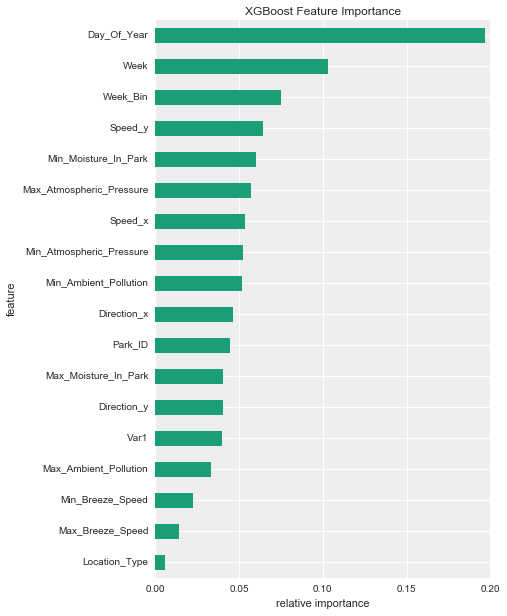

In [81]:
import operator

def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    outfile.close()

create_feature_map(X_train.columns)
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

featp = df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
fig_featp = featp.get_figure()

In [ ]:
from collections import defaultdict
from glob import glob
import sys

glob_files = 'xgb*.csv'
loc_outfile = 'Ensemble.csv'

def kaggle_bag(glob_files, loc_outfile, method="average", weights="uniform"):
  if method == "average":
    scores = defaultdict(float)
  with open(loc_outfile,"wb") as outfile:
    for i, glob_file in enumerate( glob(glob_files) ):
      print "parsing:", glob_file
      # sort glob_file by first column, ignoring the first line
      lines = open(glob_file).readlines()
      lines = [lines[0]] + sorted(lines[1:])
      for e, line in enumerate( lines ):
        if i == 0 and e == 0:
          outfile.write(line)
        if e > 0:
          row = line.strip().split(",")
          scores[(e,row[0])] += float(row[1])
    for j,k in sorted(scores):
      outfile.write("%s,%f\n"%(k,scores[(j,k)]/(i+1)))
    print("wrote to %s"%loc_outfile)

kaggle_bag(glob_files, loc_outfile)